In [7]:
!pip install scikit-learn

In [2]:
# importing the dataset
from sklearn import datasets
import pandas as pd 

df = pd.DataFrame(datasets.load_iris().data,columns = datasets.load_iris().feature_names)
df["flower type"] = datasets.load_iris().target
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   flower type        150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [3]:
# cleaning 
for c in df.columns :
    if c != "flower type" : 
        df["zscore"] =((df[c] - df[c].mean())/df[c].std(ddof=0))
        df = df[(abs(df["zscore"])<3.5)]
        df.drop("zscore",axis=1,inplace=True)
        Q1 = df[c].quantile(0.25)
        Q3 = df[c].quantile(0.75)
        IQR = Q3 - Q1 
        df = df[(df[c] > (Q1 - 1.5 * IQR)) & (df[c] < (Q3 + 1.5 * IQR))]
    
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  146 non-null    float64
 1   sepal width (cm)   146 non-null    float64
 2   petal length (cm)  146 non-null    float64
 3   petal width (cm)   146 non-null    float64
 4   flower type        146 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 6.3 KB


In [4]:
#training a model 
from sklearn.linear_model import LogisticRegression
import sklearn.model_selection as skm 
from sklearn.metrics import accuracy_score,auc
from sklearn.preprocessing import label_binarize
import numpy as np
#training a model 

y = df["flower type"].values
x = df.drop(['flower type'],axis = 1).values

x_train, x_test , y_train , y_test =  skm.train_test_split(x,y,test_size = .5 , random_state = 0 )
model = LogisticRegression() 
model.fit(x_train , y_train)

y_pre = model.predict(x_test)
print("accuracy of ",accuracy_score(y_test,y_pre))



accuracy of  0.9315068493150684


the Confusion matrix :

 [[21  0  0]
 [ 0 24  2]
 [ 0  3 23]] 


log loss : 0.18546690281830547 



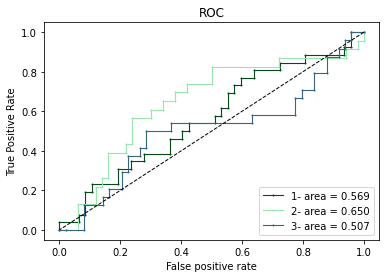


classification report :

               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        21
  versicolor       0.89      0.92      0.91        26
   virginica       0.92      0.88      0.90        26

    accuracy                           0.93        73
   macro avg       0.94      0.94      0.94        73
weighted avg       0.93      0.93      0.93        73



In [5]:
#classification report
from sklearn.metrics import classification_report, confusion_matrix , roc_curve,log_loss,roc_auc_score
import random
import matplotlib.pyplot as plt


#Confusion matrix
print("the Confusion matrix :\n\n",confusion_matrix(y_test, y_pre),"\n\n")

#log loss
print("log loss :",log_loss(y_test, model.predict_proba(x_test)),"\n")


#roc

FalseP = dict()
TrueP = dict()
roc_AreaUnderCurve = dict()

for i in range(3):
    color = (round(random.uniform(0, 1),1), round(random.uniform(0, 1),1), round(random.uniform(0, 1),1))
    FalseP[i], TrueP[i], _ = roc_curve(label_binarize(y_train,classes=[0, 1, 2])[:,i], model.predict_proba(x_test)[:, i])
    roc_AreaUnderCurve[i] = auc(FalseP[i], TrueP[i])
    plt.plot(FalseP[i], TrueP[i],color = color,linewidth=1.1, marker='.',markersize=2,label="%d- area = %.3f" %(i+1,roc_AreaUnderCurve[i]))

plt.plot([1,0],[1,0],color = (0,0,0),linewidth=1,ls = "--")
plt.xlabel("False positive rate") 
plt.ylabel("True Positive Rate")
plt.title("ROC") 
plt.legend(loc='lower right')
plt.show()



#classification_report
print("\nclassification report :\n\n",classification_report(y_test, y_pre, target_names=datasets.load_iris().target_names))



# the model predicted the setosa class correctly 100% 
# while out of the flowers the model predicted to be versicolor/virginica the prediction was correct by 88%/97% (respectively)

# when the correct answers was the of class setosa the model predicted it correctly 100%
# and when the answer was virginica/versicolor the model predected this class to be the correct one by 89%/97%

# when it comes to class 1 the model is accurate 100% and 92% for 2nd class then 93% for the 3rd one 

